In [12]:
import pandas as pd
import matplotlib.pyplot as plt
match_file = "match_simple.csv"
team_file = "team_data.csv"

In [6]:
matches = pd.read_csv(match_file)
matches.head()

,preChamps,match_key,r1,r2,r3,b1,b2,b3,winner
0,1,2019abca_f1m1,frc2122,frc359,frc6841,frc5015,frc6485,frc7246,0
1,1,2019abca_f1m2,frc2122,frc359,frc6841,frc5015,frc6485,frc7246,0
2,1,2019abca_qf1m1,frc2122,frc359,frc6841,frc1482,frc4010,frc4191,0
3,1,2019abca_qf1m2,frc2122,frc359,frc6841,frc1482,frc4010,frc4191,0
4,1,2019abca_qf2m1,frc4334,frc6351,frc5078,frc3250,frc7591,frc7799,1


In [24]:
teams = pd.read_csv(team_file)
def getTeamElo(team):
    for idx in teams.loc[teams['team'] == team].index:
        return teams.iloc[idx]['elo']
def getTeamEventWinsPerSeason(team):
    for idx in teams.loc[teams['team'] == team].index:
        return teams.iloc[idx]['event_wins_per_season']
teams.head()

,team,elo,event_wins,1_wins,2_wins,3_wins,num_seasons,event_wins_per_season
0,frc1,1560,1,0,0,1,24,0.041667
1,frc4,1557,2,1,0,1,15,0.133333
2,frc8,1572,1,0,0,1,25,0.040000
3,frc11,1600,6,2,2,2,24,0.250000
4,frc16,1726,17,11,5,1,24,0.708333


In [11]:
win_tracker = {} # team -> {'wins': X, 'losses': X}
for idx in teams.index:
    team_row = teams.iloc[idx]
    team = team_row['team']
    win_tracker[team] = {'wins': 0, 'losses': 0}

for idx in matches.index:
    match_row = matches.iloc[idx]
    match_winner = match_row['winner']
    for bot_list, alliance_id in ( (('r1', 'r2', 'r3'), 0), (('b1', 'b2', 'b3'), 1) ):
        for team in bot_list:
            win_tracker[match_row[team]]['wins' if match_winner == alliance_id else 'losses'] += 1
            
for team in win_tracker:
    win_tracker[team]['win_percentage'] = 100 * win_tracker[team]['wins'] / (win_tracker[team]['wins'] + win_tracker[team]['losses'])

In [16]:
xs = []
ys = []
for team in win_tracker:
    xs.append(getTeamElo(team))
    ys.append(win_tracker[team]['win_percentage'])

Text(0.5, 1.0, 'Team Elo vs 2019 Win %')

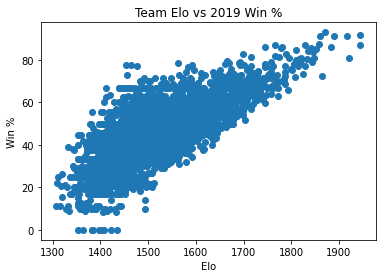

In [22]:
plt.scatter(xs, ys)
plt.xlabel('Elo')
plt.ylabel('Win %')
plt.title('Team Elo vs 2019 Win %')

In [25]:
xs = []
ys = []
for team in win_tracker:
    xs.append(getTeamEventWinsPerSeason(team))
    ys.append(win_tracker[team]['win_percentage'])

Text(0.5, 1.0, 'Event Wins Per Season vs 2019 Win %')

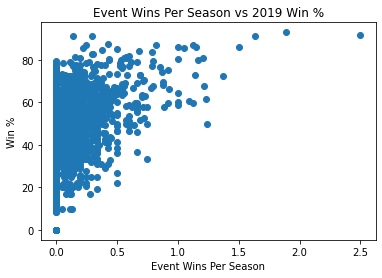

In [26]:
plt.scatter(xs, ys)
plt.xlabel('Event Wins Per Season')
plt.ylabel('Win %')
plt.title('Event Wins Per Season vs 2019 Win %')